In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [40]:
# Load the dataset from CSV file
data = pd.read_csv('income_dataset.csv')

In [41]:
# Drop rows with missing values
data.dropna(inplace=True)

In [42]:
# Convert categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)

In [45]:
# Split the data into features and target variable
X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [48]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8170744190807657


In [50]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.87      0.88      7479
        True       0.60      0.64      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



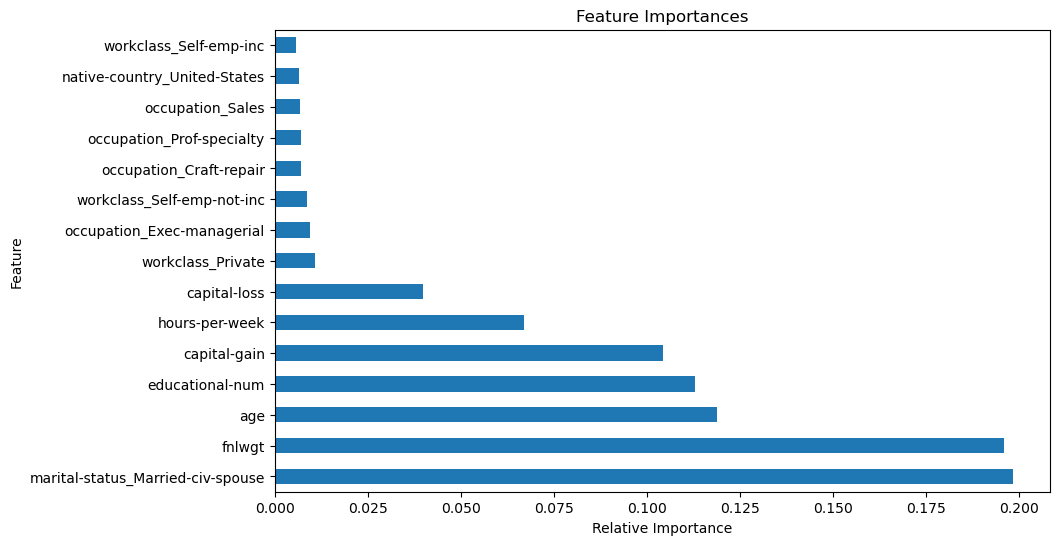

In [51]:
# Visualize feature importances
plt.figure(figsize=(10,6))
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

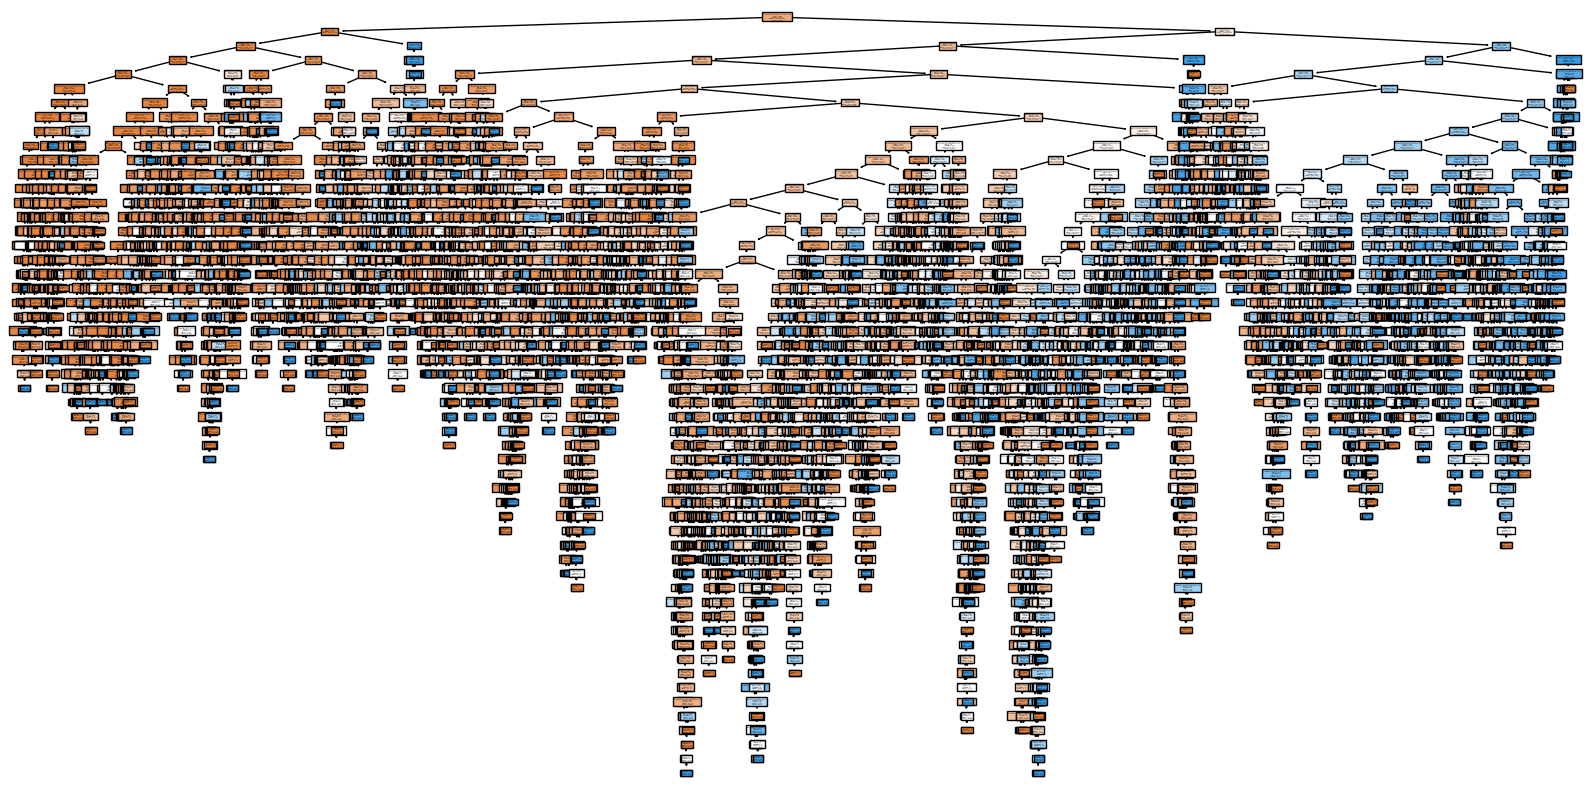

In [54]:
# Convert the Index object to a list
feature_names_list = list(X.columns)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=['<=50K', '>50K'])
plt.show()


In [56]:

# Step 1: Evaluate Performance
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8170744190807657
Confusion Matrix:
 [[6524  955]
 [ 832 1458]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.87      0.88      7479
        True       0.60      0.64      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [57]:
# Step 2: Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [58]:
# Step 3: Feature Importance
feature_importances = best_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)


Feature Importance:
                               Feature  Importance
30  marital-status_Married-civ-spouse    0.396234
2                     educational-num    0.205090
3                        capital-gain    0.189998
4                        capital-loss    0.069306
0                                 age    0.048345
..                                ...         ...
62            native-country_Columbia    0.000000
63                native-country_Cuba    0.000000
64  native-country_Dominican-Republic    0.000000
65             native-country_Ecuador    0.000000
99          native-country_Yugoslavia    0.000000

[100 rows x 2 columns]
